In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # for 3D plot
import math
%matplotlib inline
pd.set_option('display.precision', 2)
pd.set_option('display.float_format','{:20,.2f}'.format)
pd.set_option('display.max_rows',10)
plt.style.use('seaborn')


>9.a

In [27]:
`#Loading Dataset 
Auto = pd.read_csv(r"C:\Users\smtrp\OneDrive\Desktop\DS502\ISLR\Data_Sets\Auto.csv")
#Dropping NAN values
Auto.dropna()`
#Finding whether predictors are qualitative or quantitative
Auto.info()
#There is a problem here. No. of Cylinders is both, a quality and a quantity because we can put
# the vehicals in distinct categories based on the number of cylinders they have. So how are we going to do this?
# I don't know yet. I am lerning this in python for the first time, but it seems to me that a program which can see 
# repeating integer values might be the way to go here. How can I do this with a single command?




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


>9.b

In [28]:
# calculating ranges with the pd.describe() method
ranges = Auto.describe().loc['max']-Auto.describe().loc['min']
ranges

mpg                           37.60
cylinders                      5.00
displacement                 387.00
weight                     3,527.00
acceleration                  16.80
year                          12.00
origin                         2.00
dtype: float64

>9.c

In [29]:
Auto.describe().loc[['mean','std']]


,mpg,cylinders,displacement,weight,acceleration,year,origin
mean,23.52,5.46,193.53,"2,970.26",15.56,75.99,1.57
std,7.83,1.70,104.38,847.90,2.75,3.69,0.80


>9.d

In [30]:
# The only new thing we are doing is extracting the subset from the main Auto dataset
# The rest of the steps are identical to what we've done above
# The iloc method can help us find the elements based on the integers
Auto_subset = Auto.iloc[pd.np.r_[1:10, 85:len(Auto)]]
# Here pd.np.r_ is helping us merge the rows accroding to their indices
subset_desc = Auto_subset.describe().loc[['mean', 'std']]

ranges_subset = Auto_subset.describe().loc['max']-Auto_subset.describe().loc['min']
ranges_df = pd.DataFrame(ranges_subset, columns=['range']).transpose()

subset_desc = subset_desc.append(ranges_df)
subset_desc

C:\Users\smtrp\AppData\Local\Temp\ipykernel_13620\2444265276.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  Auto_subset = Auto.iloc[pd.np.r_[1:10, 85:len(Auto)]]
C:\Users\smtrp\AppData\Local\Temp\ipykernel_13620\2444265276.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_desc = subset_desc.append(ranges_df)


,mpg,cylinders,displacement,weight,acceleration,year,origin
mean,24.43,5.37,187.31,"2,935.04",15.71,77.15,1.60
std,7.92,1.65,100.05,811.63,2.70,3.11,0.82
range,35.60,5.00,387.00,"3,348.00",16.30,12.00,2.00


>9.e

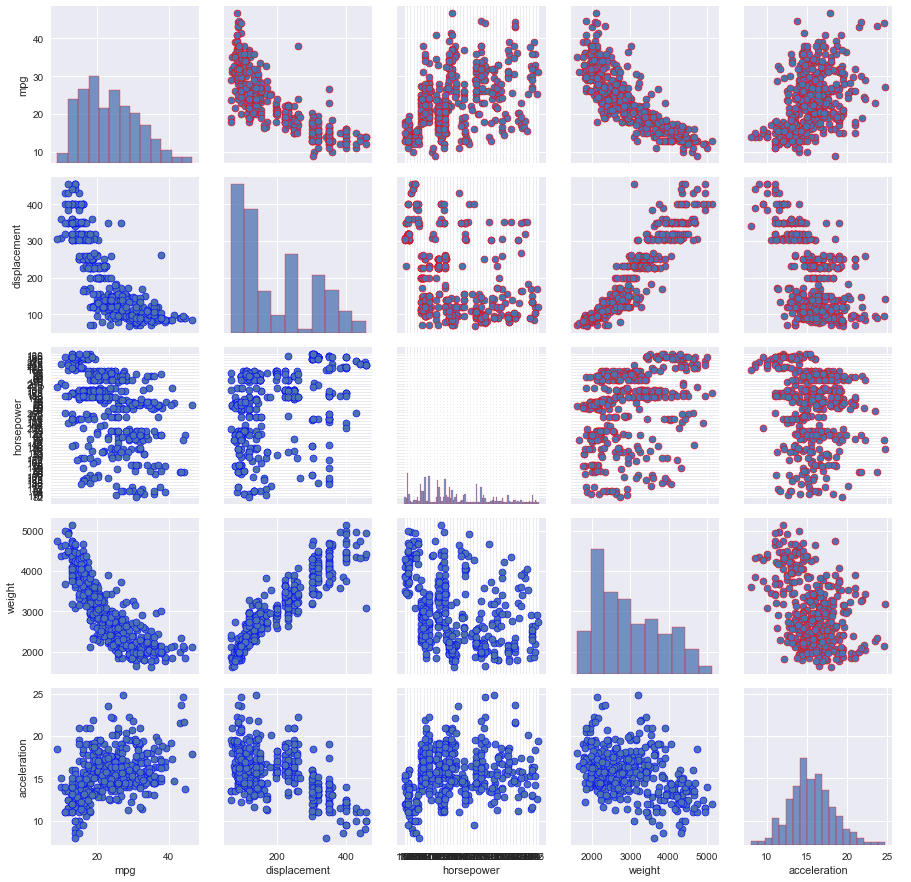

In [50]:
g = sns.PairGrid(Auto,vars=['mpg', 'displacement', 'horsepower', 'weight', 'acceleration'])
g = g.map_diag(sns.histplot, edgecolor="r")
g = g.map_upper(sns.scatterplot, edgecolor="r")
g = g.map_lower(sns.scatterplot, edgecolor="b")
g = g.add_legend()


>9.f
The scatterplots show a correlation between milage and displacement, milage and weight and milage and acceleration. We can probably create a linear relationship for all three.